In [5]:
import os, sys

codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd

from plotting import plot_utils
from model_fitting import initialize_fitting 
from utils import numpy_utils, default_paths, prf_utils
from analyze_features import analyze_feature_decoding


In [6]:
# Load everything

subject=999; # 999 is our independent set of 10,000 COCO images
feature_type='gabor_solo'
which_prf_grid=5

path_to_load = default_paths.gabor_texture_feat_path
path_to_load = os.path.join(path_to_load, 'feature_decoding')
    
fn1 = os.path.join(path_to_load, 'S%d_%s_LDA_all_grid%d_balanced.npy'%(subject, feature_type, which_prf_grid))
decoding = np.load(fn1,allow_pickle=True).item()
    
names = decoding['discrim_type_list']
acc = decoding['acc']
dprime = decoding['dprime']
    
# acc, dprime, names = analyze_feature_decoding.load_decoding(feature_type, \
#                                                             balanced=True, \
#                                                             subject=subject, \
#                                                             verbose=True)
n_axes = len(names)
prfs_use = prf_utils.get_prfs_use_decoding()

In [37]:
n_trials = 10000
n_prfs = resamp_order['trial_inds_balanced'].shape[2]
trial_masks = np.zeros((n_trials, n_prfs, n_axes)) 

for aa in range(n_axes):
    fn2load = os.path.join(default_paths.stim_labels_root, 'resampled_trial_orders', \
                           'S%d_balance_%s_for_decoding.npy'\
                               %(subject, names[aa]))
    print(fn2load)
    resamp_order = np.load(fn2load, allow_pickle=True).item()
    trial_masks[:,:,aa] = resamp_order['trial_inds_balanced'][:,0,:]

/user_data/mmhender/nsd/labels/resampled_trial_orders/S999_balance_face-none_for_decoding.npy
/user_data/mmhender/nsd/labels/resampled_trial_orders/S999_balance_building-none_for_decoding.npy
/user_data/mmhender/nsd/labels/resampled_trial_orders/S999_balance_animate-inanimate_for_decoding.npy
/user_data/mmhender/nsd/labels/resampled_trial_orders/S999_balance_small-large_for_decoding.npy
/user_data/mmhender/nsd/labels/resampled_trial_orders/S999_balance_indoor-outdoor_for_decoding.npy


In [42]:
np.any(resamp_order['trial_inds_balanced'][:,0,:])

True

In [44]:
trial_masks.shape

(10000, 1456, 5)

In [46]:
np.min(np.sum(trial_masks[:,prfs_use,:], axis=0), axis=0)

array([ 152.,  682., 2060., 1820., 6712.])

In [51]:
n_trials_used = np.sum(trial_masks[:,prfs_use,:], axis=0)[0,:]
n_trials_used

array([ 152.,  682., 2060., 1820., 6712.])

In [63]:
counts_filename = os.path.join(default_paths.stim_labels_root, 'Highlevel_counts_all.npy')
counts = np.load(counts_filename, allow_pickle=True).item()

models = prf_utils.get_prf_models(which_grid=which_prf_grid)

In [67]:
assert(which_prf_grid==5)
models = prf_utils.get_prf_models(which_grid=which_prf_grid)
n_prfs = len(models)

x = models[:,0]*8.4; y = models[:,1]*8.4;
ecc = np.round(np.sqrt(models[:,0]**2+models[:,1]**2)*8.4, 4)
sizes = np.round(models[:,2]*8.4, 4)
angles = np.round(np.mod(np.arctan2(y,x)*180/np.pi, 360),1)

ecc_vals = np.unique(ecc)
size_vals = np.unique(sizes)
n_ecc = len(ecc_vals);
n_sizes = len(size_vals)
n_angles = len(np.unique(angles))

counts = np.array([np.sum(ecc==ecc_vals[ee]) for ee in range(n_ecc)])
ecc_use = counts==(n_angles*n_sizes)
# remove smallest two sizes
size_use = np.arange(4,n_sizes)
# size_use = np.arange(3,n_sizes)
prfs_use = np.isin(ecc,ecc_vals[ecc_use]) & np.isin(sizes, size_vals[size_use])

n_prfs = len(prfs_use)
print('using %d of %d pRFs'%(np.sum(prfs_use), n_prfs))

using 768 of 1456 pRFs


In [74]:
np.max(counts['counts'][8,:,0,:], axis=0)

array([3668., 9990.,    0.])

In [82]:
np.argmax(counts['counts'][8,:,0,0], axis=0)

976

In [84]:
np.argsort(counts['counts'][8,:,0,0])

array([ 131,  670,  130, ..., 1176, 1186, 1455])

In [80]:
models[np.flip(np.argsort(counts['counts'][8,:,0,0]))[0:20],:].round(2)

array([[ 0.77, -0.32,  1.  ],
       [ 0.08,  0.08,  0.65],
       [-0.06, -0.  ,  0.65],
       [-0.06, -0.02,  0.65],
       [-0.05, -0.05,  0.65],
       [-0.02, -0.06,  0.65],
       [ 0.  , -0.06,  0.65],
       [ 0.02, -0.06,  0.65],
       [ 0.05, -0.05,  0.65],
       [ 0.06, -0.02,  0.65],
       [ 0.11,  0.  ,  0.65],
       [ 0.1 ,  0.04,  0.65],
       [ 0.04,  0.1 ,  0.65],
       [-0.05,  0.05,  0.65],
       [-0.  ,  0.11,  0.65],
       [-0.04,  0.1 ,  0.65],
       [-0.08,  0.08,  0.65],
       [-0.1 ,  0.04,  0.65],
       [-0.11, -0.  ,  0.65],
       [-0.1 , -0.04,  0.65]], dtype=float32)

In [71]:
counts_filename = os.path.join(default_paths.stim_labels_root, 'Highlevel_counts_all.npy')
counts = np.load(counts_filename, allow_pickle=True).item()


counts_each = counts['counts'][8,prfs_use,:,:]
min_counts_each_prf = np.min(counts_each[:,:,0:2], axis=2)
min_counts = np.min(min_counts_each_prf, axis=0).astype(int)
min_counts*2

array([ 302,  932, 2060, 2474, 6712])

In [58]:
# prfs_use = prf_utils.get_prfs_use_decoding(which_prf_grid=which_prf_grid)


using 896 of 1456 pRFs


In [27]:
decoding.keys()

dict_keys(['acc', 'dprime', 'sem_axes_decode', 'discrim_type_list'])

In [10]:
np.all(decoding['acc']==0)

False

In [11]:
np.mean(dprime, axis=0)

array([0.15591496, 0.44535244, 0.7076216 , 0.5708268 , 0.80954146],
      dtype=float32)

In [12]:
np.mean(acc, axis=0)

array([0.33833694, 0.39428326, 0.44051105, 0.4171896 , 0.4565618 ],
      dtype=float32)

In [13]:
np.all(dprime==0)

False

In [14]:
names

['face-none',
 'building-none',
 'animate-inanimate',
 'small-large',
 'indoor-outdoor']

In [15]:
analyze_feature_decoding.analyze_decoding_slopes(subject, \
                     feature_type, which_prf_grid=5, \
                     balanced=True, \
                     rndseed=309468, n_iter=10000)

using 896 pRFs
saving to /user_data/mmhender/features/gabor_texture/feature_decoding/prf_decoding_slopes_balanced.csv


In [16]:
fn2load = os.path.join(default_paths.gabor_texture_feat_path, \
                       'feature_decoding', 'prf_decoding_slopes_balanced.csv')
slopes_df = pd.read_csv(fn2load, index_col=0)
slopes_df.iloc[:,[0,3,4,5,8,9,10,13,14,15,18,19]]

,size slope,size pval,size fdr sig,eccen slope,eccen pval,eccen fdr sig,xpos slope,xpos pval,xpos fdr sig,ypos slope,ypos pval,ypos fdr sig
face-none,-0.006711,0.08880,False,0.001374,0.878316,False,-0.003040,0.836750,False,-0.001396,0.878316,False
building-none,0.000629,0.83675,False,0.003057,0.541000,False,0.001812,0.793231,False,-0.016476,0.000000,True
animate-inanimate,0.068463,0.00000,True,-0.046985,0.000000,True,-0.000310,0.956600,False,-0.032365,0.000000,True
small-large,0.039978,0.00000,True,-0.035646,0.000000,True,0.000949,0.878316,False,-0.013630,0.000000,True
indoor-outdoor,0.070855,0.00000,True,0.024664,0.000444,True,0.002338,0.836750,False,-0.009330,0.185091,False


In [17]:
slope_inds = np.array(['slope' in key for key in slopes_df.keys()])
slope_values = np.array(slopes_df)[:,slope_inds]
inter_inds = np.array(['inter' in key for key in slopes_df.keys()])
inter_values = np.array(slopes_df)[:,inter_inds]
sig_inds = np.array(['fdr sig' in key for key in slopes_df.keys()])
mask_fdr = np.array(slopes_df)[:,sig_inds]

In [18]:
mask_fdr

array([[False, False, False, False],
       [False, False, False, True],
       [True, True, False, True],
       [True, True, False, True],
       [True, True, False, False]], dtype=object)

#### Organizing info about the pRF parameters

In [19]:
models = initialize_fitting.get_prf_models(which_grid=5)
n_prfs = len(models)

x = models[:,0]*8.4; y = models[:,1]*8.4;
angles = np.round(np.mod(np.arctan2(y,x)*180/np.pi, 360),1)
ecc = np.round(np.sqrt(models[:,0]**2+models[:,1]**2)*8.4, 4)
no_angle = ecc<10**(-2)
angles[no_angle] = np.nan
sizes = np.round(models[:,2]*8.4, 4)

ecc_vals = np.unique(ecc)
size_vals = np.unique(sizes)
n_ecc = len(ecc_vals);
n_angles = len(np.unique(angles))-1
n_sizes = len(size_vals)

pars = [sizes, ecc, x, y]
par_names = ['size', 'eccen', 'xpos', 'ypos']

#### Choosing which pRFs to use for our analysis
Want to exclude the largest few eccentricities where not all sizes/angles are represented.

In [20]:
# counts = np.array([np.sum(ecc==ecc_vals[ee]) for ee in range(n_ecc)])
# ecc_use = counts==(n_angles*n_sizes)
# prfs_use = np.isin(ecc,ecc_vals[ecc_use])
prfs_use = prf_utils.get_prfs_use_decoding()

In [11]:
ecc_vals

array([0.    , 0.2366, 0.5399, 0.9286, 1.4268, 2.0653, 2.8837, 3.9326,
       5.2769, 7.    ], dtype=float32)

In [16]:
np.all(dprime==0)

True

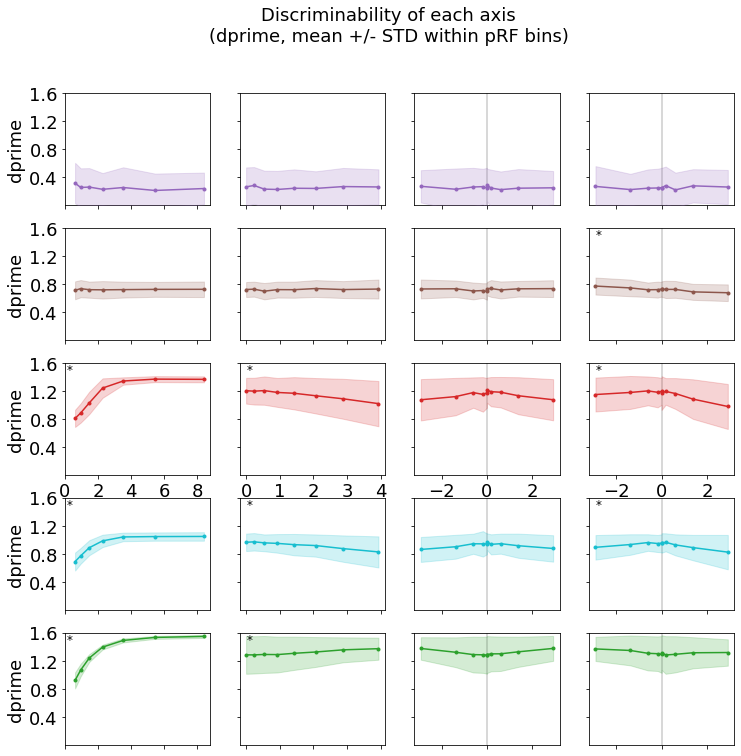

In [25]:
# plot semantic corr coefs as a function of pRF params

plt.figure(figsize=(12,12));
plot_utils.set_all_font_sizes(12)
plt.rcParams['pdf.fonttype']=42

colors = cm.tab10(np.linspace(0,1,10))[[4,5, 3, 9,2],:]

# n_bins = 10;
# linear_bins=False
n_bins=10
linear_bins=False

ylims = [0, 1.6];
yticks = [0.4, 0.8, 1.2, 1.6]

xticks = [[0,2,4,6,8], [0,1,2,3,4], [-2, 0, 2], [-2, 0, 2]]

starlocs = [[0.3, 1.45], [0.1, 1.45], [-2.8, 1.45], [-2.8, 1.45]]

plot_utils.set_all_font_sizes(18)
pi=0;

for ai in range(n_axes):
    
    name = names[ai]
    vals = dprime[prfs_use,ai]
    
    pi+=1
    plt.subplot(n_axes,4,pi)
    
    x_vals = sizes[prfs_use]

    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ai,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    if ai==2:
        plt.xlabel('pRF size (deg)')
        plt.xticks(xticks[0])
    else:
        plt.xticks(xticks[0], labels=[])
    plt.ylabel('dprime')
    plt.ylim(ylims)
    plt.yticks(yticks)
    if mask_fdr[ai,0]:
        plt.gca().annotate('*',
                    xy=starlocs[0],
                    zorder=20,
                    color="k",
                    ha="center",
                    fontsize=12,
                )

    pi+=1
    plt.subplot(n_axes,4,pi)
    
    x_vals = ecc[prfs_use]

    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ai,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    if ai==2:
        plt.xlabel('eccen (deg)')
        plt.xticks(xticks[1])
    else:
        plt.xticks(xticks[1], labels=[])
    plt.ylim(ylims)
    plt.yticks(yticks,labels=[])
    if mask_fdr[ai,1]:
        plt.gca().annotate('*',
                    xy=starlocs[1],
                    zorder=20,
                    color="k",
                    ha="center",
                    fontsize=12,
                )
    pi+=1
    plt.subplot(n_axes,4,pi)
    
    x_vals = x[prfs_use]

    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True)    
    plt.plot(xbinned, ybinned, '.-', color=colors[ai,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    if ai==2:
        plt.xlabel('x pos (left-right)')
        plt.xticks(xticks[2])
    else:
        plt.xticks(xticks[2], labels=[])
    # plt.ylabel('dprime')
    plt.ylim(ylims)
    plt.yticks(yticks,labels=[])
    plt.axvline(0, color=[0.8, 0.8, 0.8])
    if mask_fdr[ai,2]:
        plt.gca().annotate('*',
                    xy=starlocs[2],
                    zorder=20,
                    color="k",
                    ha="center",
                    fontsize=12,
                )

    pi+=1
    plt.subplot(n_axes,4,pi)
    
    x_vals = y[prfs_use]

    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ai,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    if ai==2:
        plt.xlabel('y pos (down-up)')
        plt.xticks(xticks[3])
    else:
        plt.xticks(xticks[3], labels=[])
    plt.ylim(ylims)
    plt.yticks(yticks,labels=[])
    plt.axvline(0, color=[0.8, 0.8, 0.8])
    if mask_fdr[ai,3]:
        plt.gca().annotate('*',
                    xy=starlocs[3],
                    zorder=20,
                    color="k",
                    ha="center",
                    fontsize=12,
                )
        
    plt.suptitle('Discriminability of each axis\n(dprime, mean +/- STD within pRF bins)')
    
# fn2save = '/user_data/mmhender/imStat/figures/Gabor_decoding_spatialbins.pdf'
# plt.savefig(fn2save)

# fn2save = os.path.join(default_paths.fig_path,'Gabor_decoding_spatialbins_sepplots.pdf')
# plt.savefig(fn2save)

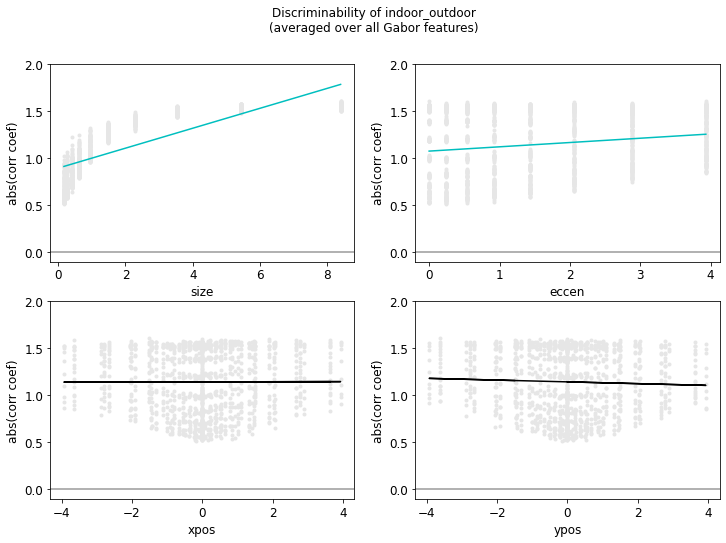

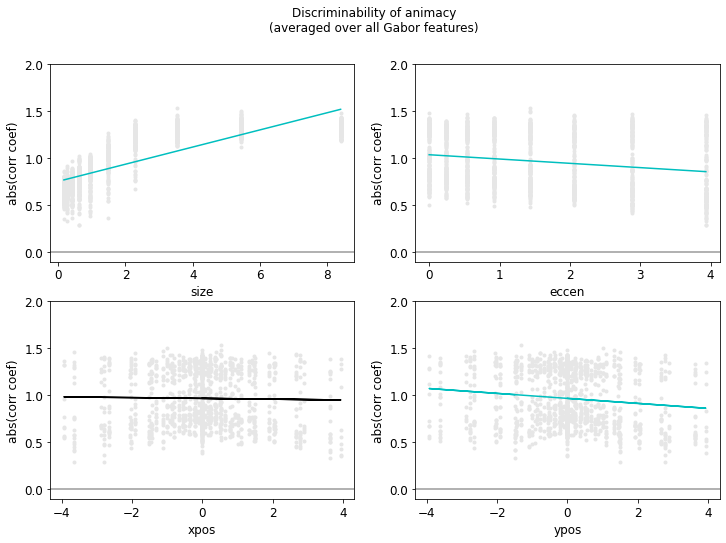

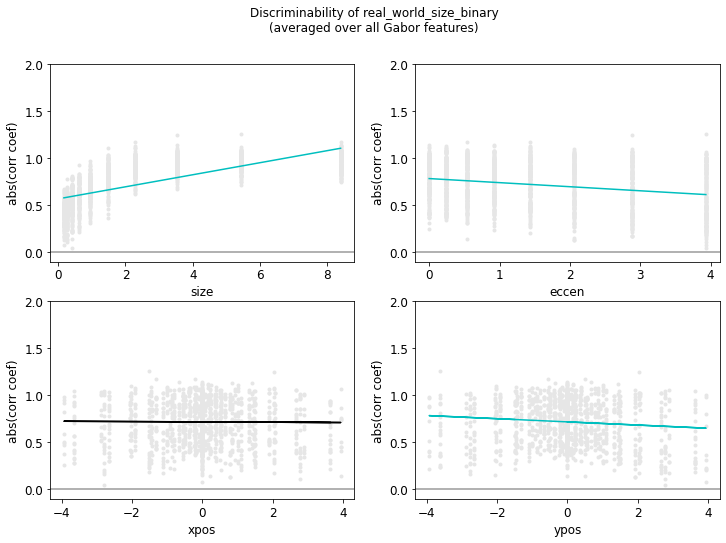

In [18]:
# Plot actual points - significant fits in cyan

plot_utils.set_all_font_sizes(12)

n_axes = len(names)
for ai in range(n_axes):
    
    name = names[ai]
    vals = dprime[prfs_use,ai]

    plt.figure(figsize=(12,8));

    for pi, par in enumerate(pars):
        
        plt.subplot(2,2,pi+1)
        
        x_vals = par[prfs_use];
        yhat = x_vals*slope_values[ai,pi]+inter_values[ai,pi]
    
        if mask_fdr[ai,pi]:
            linecolor='c'
        else:
            linecolor='k'
            
        plt.plot(x_vals, vals,'.',color=[0.9, 0.9, 0.9])
        plt.plot(x_vals, yhat, '-', color=linecolor)

        plt.xlabel('%s'%par_names[pi])
        plt.ylabel('abs(corr coef)')
        plt.ylim([-0.1, 2.0])
        plt.axhline(0,color=[0.6, 0.6, 0.6])
        # plt.ylim([0, 0.2])
        # plt.yticks([0,0.1,0.2])

    plt.suptitle('Discriminability of %s\n(averaged over all Gabor features)'%name)